# Risoluzione tramite euristica gerarchica del clustering 


### Breve descrizione del problema di clustering

Il problema di clustering consiste nel raggruppamento in k cluster di un numero n di samples, con lo scopo di minimizzare il costo di afferenza dei sample in ogni cluster.

# Inizializzazione dell'istanza 

[[-0.31332345 -4.25352048]
 [-2.68531026 -3.61156024]
 [-1.07861486 -3.40556561]
 ...
 [ 1.41678723 -3.24165649]
 [-0.5547487  -9.84094982]
 [ 1.53816136 -1.2516212 ]]
[[-1.28010196 -9.48147536]
 [ 0.99324956 -1.29355215]
 [-1.59264396 -3.39330358]
 [-5.90702732  2.38541933]]
[2 2 2 1 1 0 1 2 3 2 1 0 1 0 0 2 2 3 2 1 3 0 0 3 1 3 3 3 0 2 0 0 2 3 1 0 1
 2 2 1 3 3 1 2 3 0 0 1 1 0 0 3 0 3 2 3 3 0 2 1 3 1 3 0 1 3 0 1 3 0 2 1 3 3
 2 2 1 1 3 2 3 1 2 2 0 2 3 3 1 2 3 0 2 0 1 2 2 0 3 0 3 3 3 1 1 2 2 1 0 3 0
 3 1 3 0 0 0 0 2 2 0 3 0 2 1 2 3 0 1 0 2 0 0 0 1 0 3 2 1 1 3 1 0 2 3 3 1 1
 1 3 1 1 3 0 1 1 1 3 2 2 0 2 1 2 0 2 0 1 1 2 1 3 3 0 3 2 1 2 2 3 3 0 2 2 2
 1 2 1 0 0 1 3 2 2 1 0 3 2 3 3 3 3 3 2 3 1 2 3 0 2 0 2 3 3 0 3 0 3 0 3 2 3
 3 0 2 1 1 1 3 3 2 1 3 3 3 3 2 0 2 3 1 1 3 2 0 0 2 0 2 1 0 3 1 1 1 0 1 2 3
 1 2 1 2 2 2 0 2 0 3 2 1 0 1 1 0 2 0 2 1 0 3 2 3 1 3 0 2 0 2 3 2 1 3 1 2 1
 2 0 3 0 3 0 2 1 1 2 0 1 1 0 2 3 3 2 2 0 0 2 2 1 1 2 1 0 1 3 2 1 1 1 2 1 1
 3 3 3 0 2 1 1 2 1 0 1 2 0 0 3 2 0 2 1 1 0 2 1 2

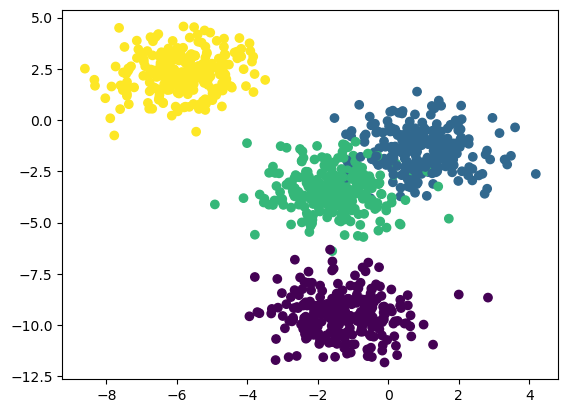

In [107]:

import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt





# Generare un dataset di esempio
n_samples = 1000
n_features = 2
n_clusters = 4
random_state = 2

X, y,c = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters,cluster_std = 1, random_state=random_state, shuffle = True, return_centers=True)
print(X)
print(c)


print(y)
#Disegno l'istanza generata (Ha senso solo per n_features = 2)
plt.scatter(X[:, 0], X[:, 1], c= y )

plt.show()


## Euristica costruttiva per risolvere il problema di clustering 

In [88]:
matrix_distance = pdist(X)

print(matrx_distance)
print(len(matrx_distance))
       

[2.4573226  1.14223395 2.81089474 ... 6.88749784 1.99373322 8.84063565]
499500


In [94]:
Z = linkage(matrix_distance, method = 'ward')

Z

array([[3.25000000e+02, 9.17000000e+02, 5.17755904e-03, 2.00000000e+00],
       [6.57000000e+02, 7.06000000e+02, 7.99646834e-03, 2.00000000e+00],
       [8.29000000e+02, 9.47000000e+02, 9.48267416e-03, 2.00000000e+00],
       ...,
       [1.99200000e+03, 1.99500000e+03, 5.02871334e+01, 4.98000000e+02],
       [1.99400000e+03, 1.99600000e+03, 1.29813818e+02, 7.49000000e+02],
       [1.99300000e+03, 1.99700000e+03, 1.70633079e+02, 1.00000000e+03]])

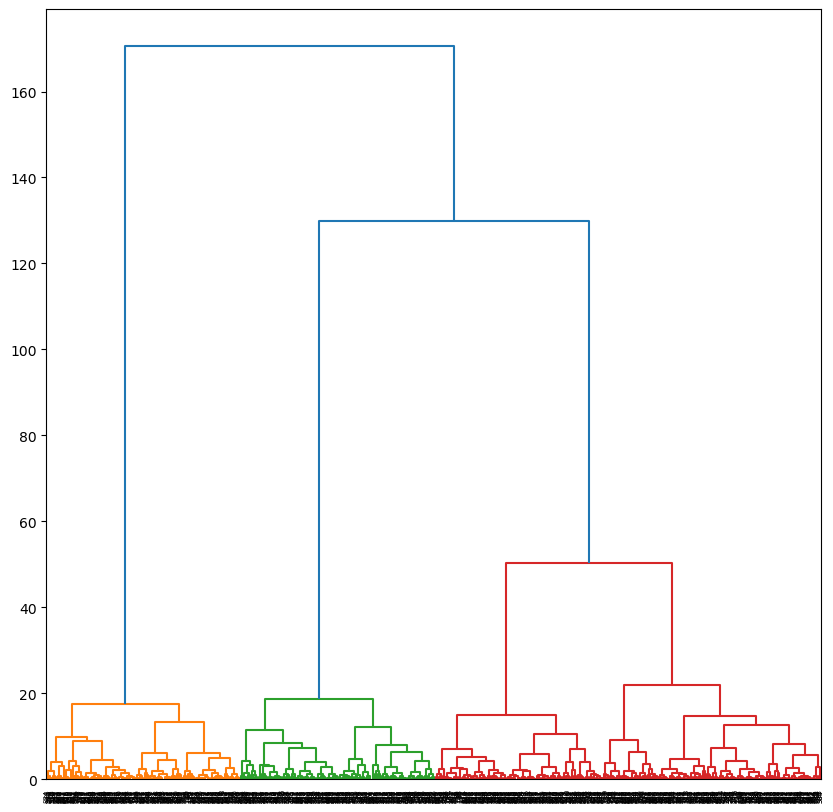

In [95]:
plt.figure(figsize= (10,10))
dendrogram(Z)
plt.show()

In [96]:
def obj_tot(n_samples,n_features,y_pred,X):
    opt = 0
    for k in range(n_samples):
        for h in range(k, n_samples):      #faccio partire da k per nn far contare due volte la stessa distanza 
            if y_pred[k] == y_pred[h]:     #Calcolo la distanza solo se i due nodi appartengono allo stesso cluster 
                sum = 0
                for f in range(n_features):
                    sum = sum +(X[h,f]-X[k,f])**2
                dist = np.sqrt(sum)    
                opt = opt + dist
    return opt

In [101]:
max_dist = 20

clusters = fcluster(Z, max_dist, criterion = 'distance')

print(clusters)

[3 3 3 5 5 2 5 3 1 4 4 2 5 2 2 3 3 1 3 5 1 2 2 1 5 1 1 1 2 3 2 2 4 1 5 2 5
 3 3 5 1 1 5 3 1 2 2 5 4 2 2 1 2 1 3 1 1 2 3 5 1 5 1 2 3 1 2 5 1 2 4 5 1 1
 3 5 5 5 1 3 1 4 3 3 2 3 1 1 5 3 1 2 3 2 5 3 3 2 1 2 1 1 1 5 5 3 3 5 2 1 2
 1 5 1 2 2 2 2 3 4 2 1 2 3 5 3 1 2 5 2 3 2 2 2 5 2 1 3 5 5 1 5 2 3 1 1 5 5
 4 1 5 5 1 2 5 5 5 1 4 3 2 3 5 3 2 3 2 4 4 3 5 1 1 2 1 3 4 3 3 1 1 2 3 5 5
 5 3 5 2 2 5 1 3 3 5 2 1 4 1 1 1 1 1 3 1 5 4 1 2 3 2 3 1 1 2 1 2 1 2 1 3 1
 1 2 3 5 5 5 1 1 3 5 1 1 1 1 3 2 4 1 4 5 1 3 2 2 3 2 4 5 2 1 4 5 5 2 5 3 1
 5 3 5 3 3 3 2 3 2 1 3 5 2 4 5 2 3 2 3 5 2 1 3 1 5 1 2 3 2 3 1 3 4 1 5 3 5
 3 2 1 2 1 2 3 5 4 5 2 5 4 2 3 1 1 3 3 2 2 3 3 5 5 3 5 2 5 1 3 5 5 5 3 5 5
 1 1 1 2 3 5 5 3 5 2 5 3 2 2 1 3 2 3 5 4 2 3 5 3 5 2 2 4 1 1 2 5 2 3 2 2 2
 1 3 2 5 2 1 1 3 1 2 3 2 1 1 1 5 3 2 1 5 3 1 1 2 2 3 2 1 1 5 1 3 2 4 1 5 5
 5 5 2 2 5 1 3 3 1 2 3 3 2 3 3 3 1 2 2 2 1 5 5 1 3 5 3 3 5 5 2 1 3 2 1 5 3
 3 2 5 2 2 1 2 2 5 2 5 1 5 5 5 2 1 3 4 3 3 2 2 1 3 3 2 1 2 2 4 1 2 4 5 2 1
 5 2 1 3 2 5 2 5 2 3 2 5 

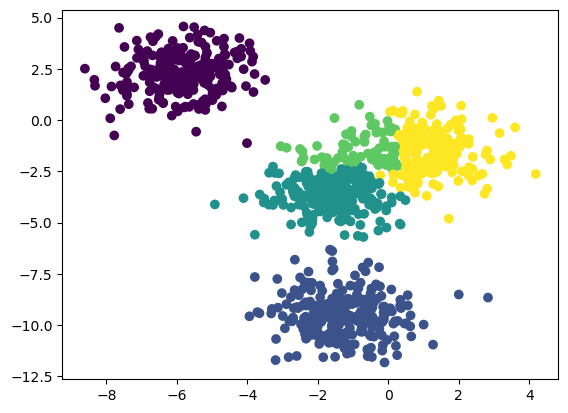

In [102]:
plt.scatter(X[:, 0], X[:, 1], c= clusters )

# Tentativo di miglioramento tramite euristica di ricerca locale 

### definizione della mossa

In [163]:
import matplotlib

matplotlib.rcParams["contour.negative_linestyle"] = "solid"

# Example settings
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers



blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, 0.3], **blobs_params)[0],
    4.0
    * (
        make_moons(n_samples=n_samples, noise=0.05, random_state=0)[0]
        - np.array([0.5, 0.25])
    ),
    14.0 * (np.random.RandomState(42).rand(n_samples, 2) - 0.5),
]

print(datasets[0][:,0])

[-0.5634129  -0.18234677 -0.66712924  0.0996501   1.08161797 -0.57867763
 -0.13783527 -0.15455722 -0.80694892 -0.81631726 -0.09252684 -0.21757678
  0.36454528  0.96147101  0.38570297  0.42896196  1.13487731  0.56970034
  0.20117082 -1.14431002 -0.23342277 -0.34728393  0.74703954 -0.19761449
  0.76638961 -0.19366341 -0.34391881  0.07202179 -0.9681399   0.1854125
  0.43129801 -0.3261468  -0.38207196  0.5940149  -0.20680949  0.54817342
  0.21312937 -0.06685078  0.30703969  0.58938979  0.14911909 -0.43061284
 -0.15577627  1.12965448  0.10413749  0.19800336 -0.3697815  -0.4779725
 -0.25540257 -0.92153478  0.1399623   0.5498298  -0.31792304 -0.32620429
  0.88202617 -0.62639768  0.15653385 -0.5865617   0.14317184 -0.06505348
 -0.13386677  0.38589528  0.43791638 -0.35980219 -0.33623022  0.13725818
  0.01931528 -0.31871851  0.04886248 -0.34602492  0.00525001 -0.40668213
  0.31261573 -0.00851021  0.7441261   0.08871307  0.19136622  0.68226592
  0.42841531  0.33319154 -0.45364918 -0.65795371 -0.3

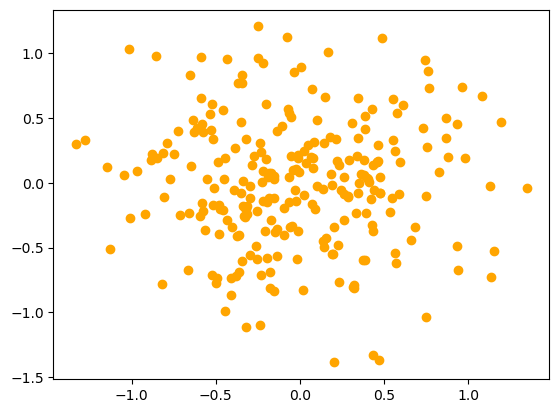

In [164]:
plt.scatter(datasets[0][:,0], datasets[0][:,1], c='orange' )

[[ 2.02100097  0.49017924]
 [ 1.6782009  -0.20198687]
 [-0.28224484  0.85878484]
 ...
 [ 0.32515039 -0.32838537]
 [ 0.09757054  0.1183474 ]
 [ 0.57081524 -0.44534014]]
[[-1.28010196 -9.48147536]
 [ 0.99324956 -1.29355215]
 [-1.59264396 -3.39330358]
 [-5.90702732  2.38541933]]
[1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1
 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0
 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0
 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1
 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1
 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1
 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 0
 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0
 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0

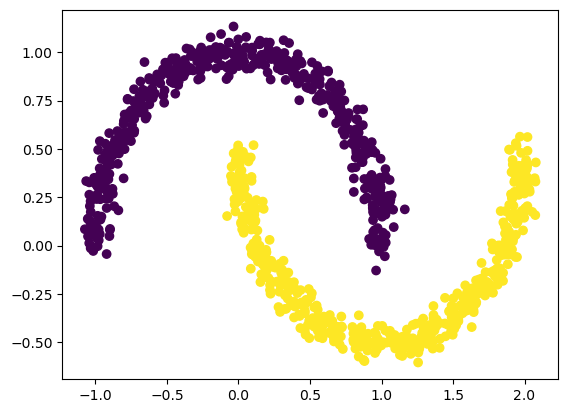

In [166]:
n_samples = 1000
n_features = 2
n_clusters = 4
random_state = 2

X, y = make_moons(n_samples=n_samples, noise=0.05, random_state=0)
print(X)
print(c)


print(y)
#Disegno l'istanza generata (Ha senso solo per n_features = 2)
plt.scatter(X[:, 0], X[:, 1], c= y )

plt.show()



In [167]:
n_clusters = 9
kmeans = KMeans(n_clusters=n_clusters,init = "random",random_state= 1, n_init=1)
kmeans

NameError: name 'KMeans' is not defined